In [1]:
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv", parse_dates=["datetime"])

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Explore

### datetime

In [3]:
train["datetime-year"] = train["datetime"].dt.year
train["datetime-month"] = train["datetime"].dt.month
train["datetime-day"] = train["datetime"].dt.day
train["datetime-hour"] = train["datetime"].dt.hour
train["datetime-minute"] = train["datetime"].dt.minute
train["datetime-second"] = train["datetime"].dt.second

print(train.shape)
train[["datetime", "datetime-year", "datetime-month", "datetime-day", "datetime-hour", "datetime-minute", "datetime-second"]].head()

(10886, 18)


,datetime,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


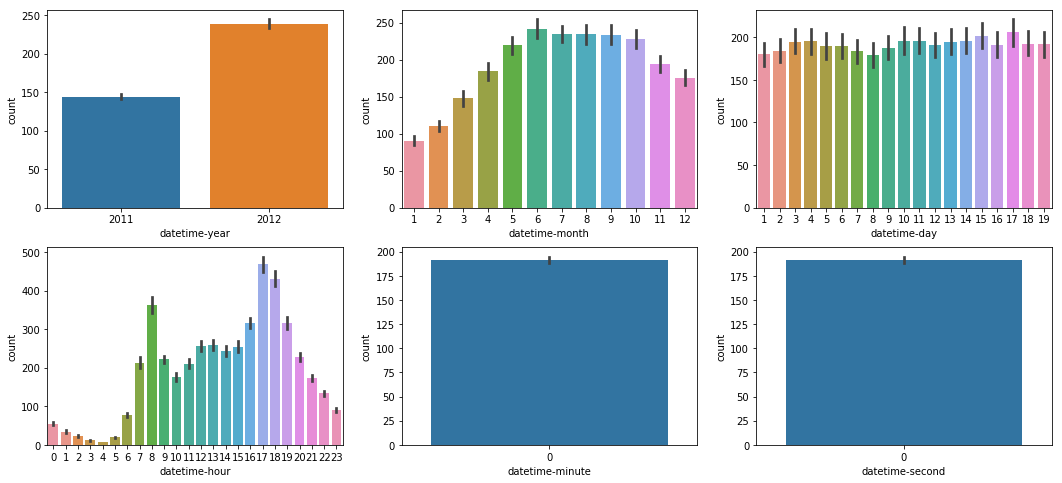

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 8)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)
sns.barplot(data=train, x="datetime-day", y="count", ax=ax3)
sns.barplot(data=train, x="datetime-hour", y="count", ax=ax4)
sns.barplot(data=train, x="datetime-minute", y="count", ax=ax5)
sns.barplot(data=train, x="datetime-second", y="count", ax=ax6)

** Lesson Learned ** 
  * 2011년보다 2012년의 자전거 대여량이 더 높다.
  * 주로 여름(6월~8월)에 대여량이 높으며, 겨울(1월, 12월)에 대여량이 낮다.
  * 얼핏 보면 1월보다 12월의 대여량이 높은 것으로 보인다.
  * 주로 출근 시간(8시)과 퇴근 시간(17시~18시)에 많이 대여한다.
  * **datetime-minute**와 **datetime-second**는 기록되고 있지 않다. (그러므로 사용할 필요가 없다)
  * **datetime-day**는 1일 ~ 19일밖에 없다. (test데이터가 20일 ~ 31일을 보유하고 있다) 그러므로 이 컬럼을 사용해서는 안 된다.

### dayofweek

In [6]:
train["datetime-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "datetime-dayofweek"]].head()

(10886, 19)


,datetime,datetime-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


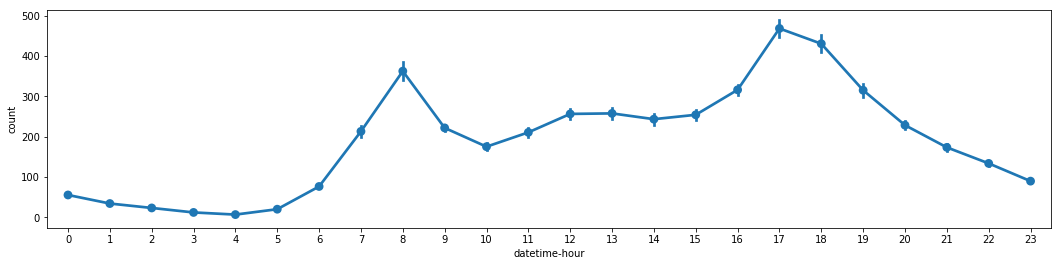

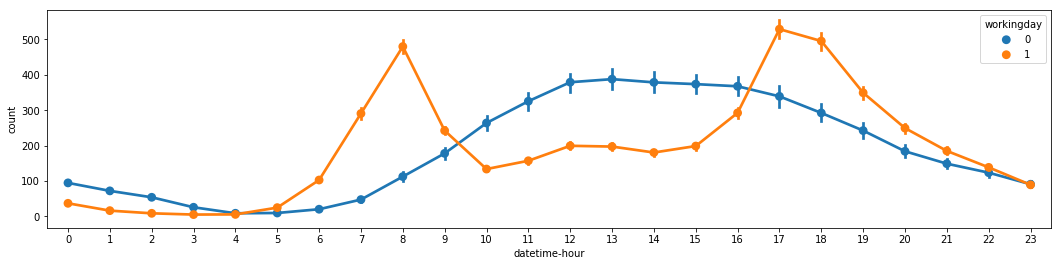

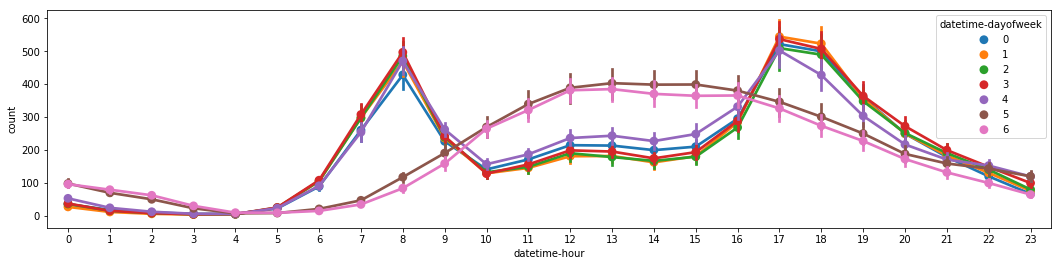

In [7]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="workingday", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.pointplot(data=train, x="datetime-hour", y="count", hue="datetime-dayofweek", ax=ax3)

** Lesson Learned **

  * 주중(workingday==0)에는 출퇴근 시간에, 주말(workingday==1)에는 오후에 많이 빌린다.
  * 금요일은 주중이지만 어느정도 주말의 속성을 보유하고 있다. (출퇴근 시간에 덜 빌리고, 오후에 더 빌린다)
  * 비슷하게 월요일도 주중이되 주말의 성향을 보유하고 있다.

### Concatenate year and month

In [14]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["datetime-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "datetime-year_month"]].head()

(10886, 20)


,datetime,datetime-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


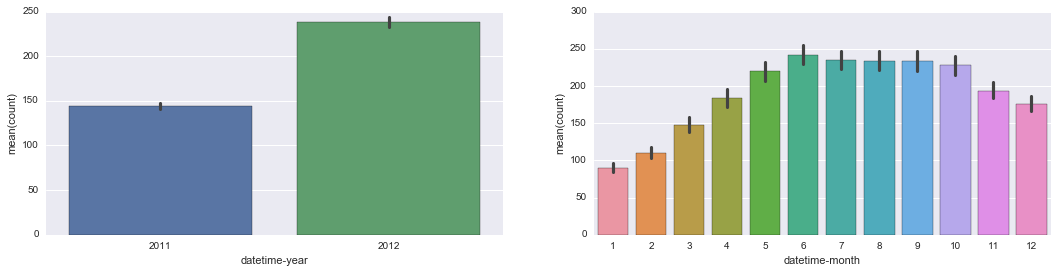

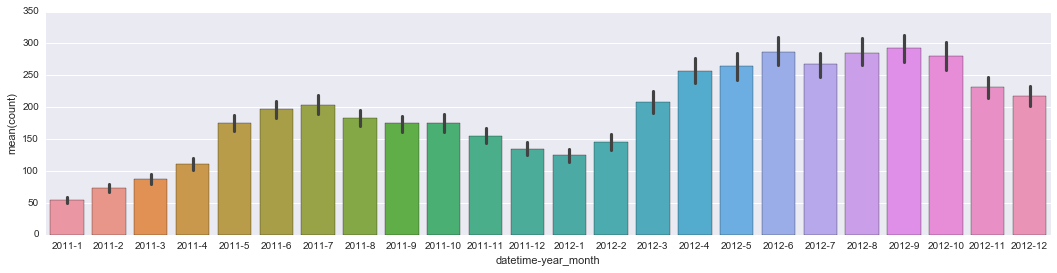

In [15]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year", y="count", ax=ax1)
sns.barplot(data=train, x="datetime-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="datetime-year_month", y="count", ax=ax3)

** Lesson Learned **
  * 자전거 대여량은 꾸준히 상승하고 있다.
  * 2011년 12월과 2012년 1월의 자전거 대여량은 비슷하다. 그러므로 12월이 1월보다 많이 빌린다고 볼 수는 없다.
  * 2012년은 6월에서 7월 사이 자전거 대여량이 감소하지만, 2011년은 7월부터 8월 사이에 자전거 대여량이 감소한다.